## 6장 6절 K-최근접 이웃(KNN)

### scikit-learn의 KNeighborsClassifier

In [4]:
import pandas as pd

df_liver = pd.read_csv('./data/indian_liver_patient.csv')
df_liver.Dataset.unique()

array([1, 2], dtype=int64)

In [5]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
import numpy as np

df_liver['Gender'] = np.where(df_liver['Gender']=='Female', 0, 1)
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
df_liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
df_liver.dropna(axis = 0, inplace=True)
df_liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X = df_liver[df_liver.columns.difference(['Dataset'])]
y = df_liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(405, 10) (405,) (174, 10) (174,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[106  18]
 [ 39  11]]


정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### scikit-learn의 KNeighborsRegressor

In [15]:
# 임의의 샘플데이터 생성하기
np.random.seed(0)

X = np.sort(5*np.random.rand(400,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y= np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [26]:
y[::1]+=1*(0.5-np.random.rand(400))
y[:10]

array([ 0.04300549, -0.84178548,  0.33393106, -0.81046565, -1.34599613,
        0.57277174, -0.47152967,  0.91773202,  0.17481782, -0.24809118])

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.7,  random_state=1)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(280, 1) (120, 1) (280,) (120,)


In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(X_train2, y_train2)
knn_dis.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [29]:
uni_pred = knn_uni.predict(X_test2)
dis_pred = knn_dis.predict(X_test2)

In [30]:
preds = [uni_pred, dis_pred]
weights = ['uniform','distance']
evls = ['mse','rmse', 'mae']

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test2, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test2, pred)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results

,mse,rmse,mae
uniform,0.51,0.71,0.57
distance,0.58,0.76,0.62


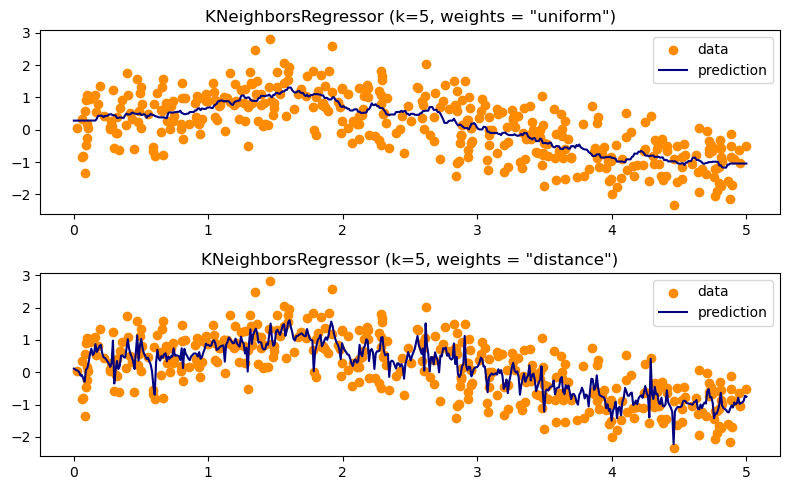

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform','distance']):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X,y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('KNeighborsRegressor (k=%i, weights = "%s")' % (5, weights))
    
plt.tight_layout()
plt.show()